#House_Data - Predicting the house prices.

### In this project we will be using the House data and we will be predicting the house prices.
### Steps followed in the project-
1. Analysing, cleaning and manipulating the data
2. Feature selection
3. Visualisation of insights
4. Label Encoding & feature correlation
5. Test-train split and apllying models

In [6]:
# Library setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/house_price.csv')

In [3]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [7]:
df.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


## Visualisation

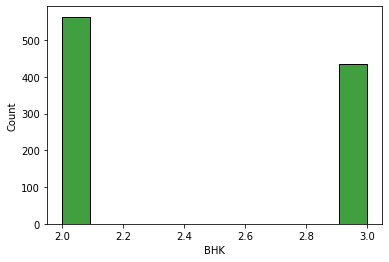

In [8]:
sns.histplot(df.BHK, color = "green")
plt.show()

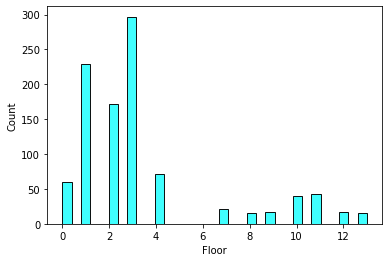

In [13]:
sns.histplot(df.Floor, color = "cyan")
plt.show()

## Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])

In [16]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


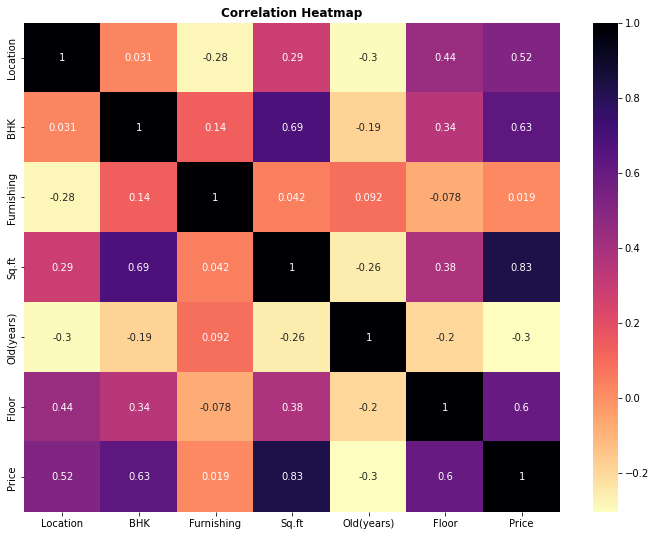

In [17]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

BHK and location has very little correlation with price. So, these features can be removed.

In [19]:
x = df.drop(["Price", "BHK", "Location"], axis = 1)
y = df["Price"]
x = x.values
y = y.values

## Test-Train Split of data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=10)

# Applying Models- Linear Regression Model

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

82.25306664091795 %


## Conclusion
## Linear regressionmodel has given us the more than required accuracy, hence this model can be accepted.